In [23]:
#Visualizing Data 
import seaborn as sns
import matplotlib.pyplot as plt

#Building Models 
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score, precision_recall_curve, precision_score, recall_score, make_scorer, classification_report, confusion_matrix
from keras import layers, models

#Extras
import time 
import graphviz
import pydotplus

# Exploratory Data Analysis

Things that will be covered: 

    - Check for null values   - DONE 
    - Find the mean/std. deviation, etc to determine any outliers in the data - DONE
    - Determine correlation between features, identify useful features - DONE
    - Determine if there is class imbalance - DONE 

In [3]:
df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Initial thoughts about data

Just by initially looking at the data, time and amount will be key features to identify whether a transaction will be fraudulent or not. 

Time: seconds elapsed since the first transaction

Amount: Amount spent on the transaction 

The other features are a PCA transformations of data done to protect the identity of those whom the data was collected from. 

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# No null values in dataset

In [104]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Thoughts: 

Most of the features have close to mean of 0, and std deviation of 1, V1-V28 are normalized. 

Time and Amount will need to be normalized to make it easier for the models to work with the data. 

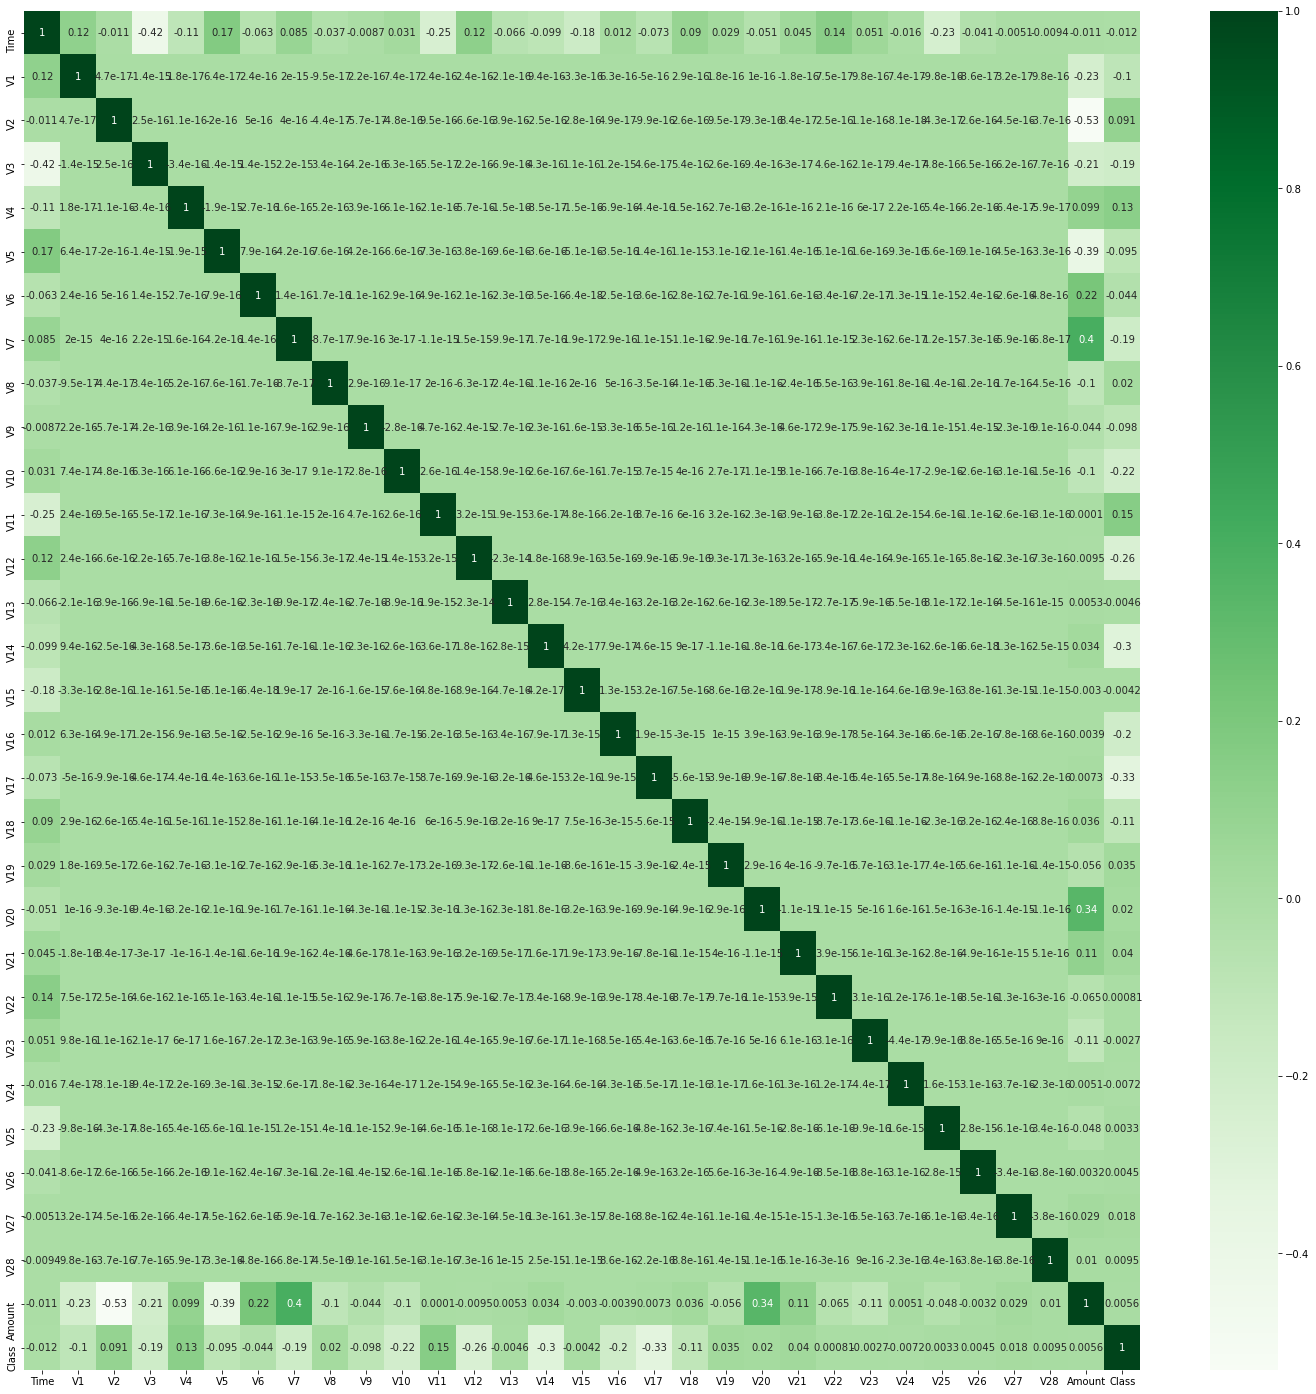

In [4]:
corr = df.corr()
plt.subplots(figsize=(25,25))
g = sns.heatmap(data = corr, annot = True, cmap = 'Greens')

In [5]:
useful_ft = df.corrwith(df['Class']).sort_values(key= lambda x: abs(x), ascending=False).head(10)
useful_ft = list(useful_ft.keys())
useful_ft.append('Time')
useful_ft.append('Amount')

# Top 10 features from correlation: 

- V17, V14, V12, V1, V16, V3, V7, V11, V4 

Most of these features show negative correlation with the target variable meaning as the feature value increases the likelihood of the transaction being fraudulent decreases 

Furthermore it is obvious that time, and amount are necessary features for the model and hence were added aside from the top 10. 

In [6]:
def find_outliers(column_name, dataframe): 
    q1 = dataframe[column_name].quantile(0.25)
    q3 = dataframe[column_name].quantile(0.75)
    iqr = q3 - q1 
    upper_limit = q3+1.5*iqr 
    lower_limit = q1-1.5*iqr 
    
    return dataframe.loc[(dataframe[column_name]>upper_limit) | (dataframe[column_name]<lower_limit)]

def find_regular(column_name, dataframe): 
    q1 = dataframe[column_name].quantile(0.25)
    q3 = dataframe[column_name].quantile(0.75)
    iqr = q3 - q1 
    upper_limit = q3+1.5*iqr 
    lower_limit = q1-1.5*iqr 
    
    return dataframe.loc[(dataframe[column_name]<upper_limit) | (dataframe[column_name]>lower_limit)]


# Analyzing outliers

The plots above do not really show anything informative other than the fact they confirm that lower values of the useful features are more likely to fraudulent transactions 

In [108]:
outlier = {}
regular = {}

for feature in useful_ft: 
    outlier[feature] = find_outliers(column_name = feature, dataframe = df)
    regular[feature] = find_regular(column_name = feature, dataframe = df)

Text(0.5, 1.0, 'Regular')

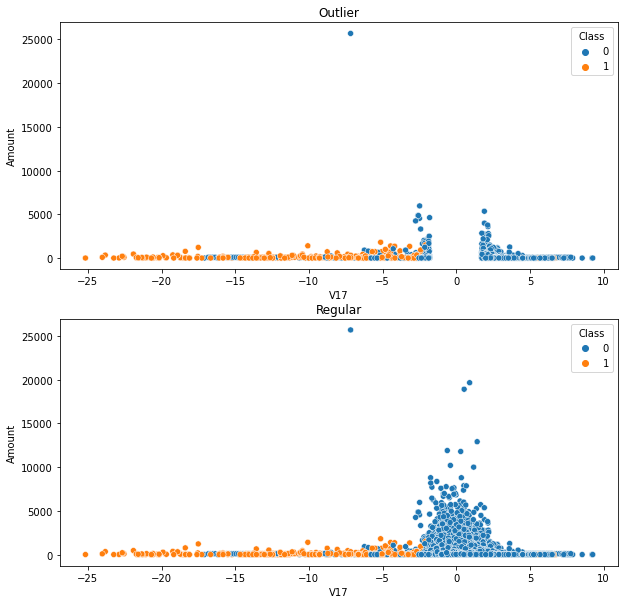

In [109]:
fig, axs = plt.subplots(nrows=2, figsize = (10,10))
g = sns.scatterplot(data = outlier['V17'], x = 'V17', y = 'Amount', hue = 'Class', ax = axs[0])
h = sns.scatterplot(data = regular['V17'], x = 'V17', y = 'Amount', hue = 'Class', ax = axs[1])
g.set_title("Outlier")
h.set_title('Regular')

Text(0.5, 1.0, 'Regular')

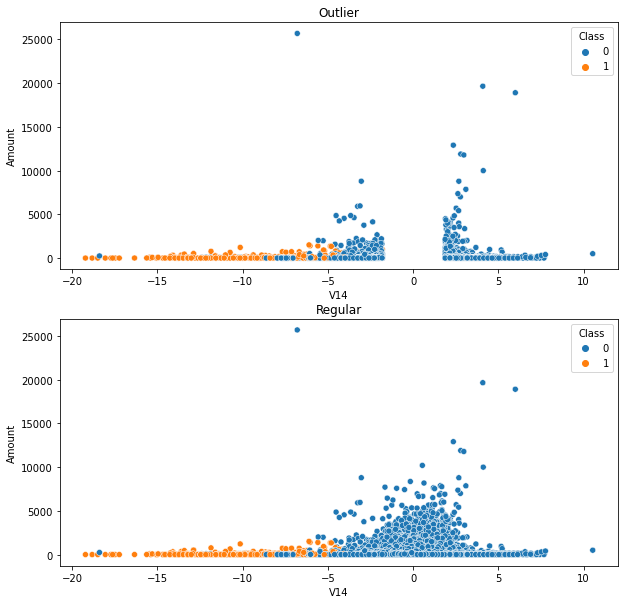

In [110]:
fig, axs = plt.subplots(nrows=2, figsize = (10,10))
g = sns.scatterplot(data = outlier['V14'], x = 'V14', y = 'Amount', hue = 'Class', ax = axs[0])
h = sns.scatterplot(data = regular['V14'], x = 'V14', y = 'Amount', hue = 'Class', ax = axs[1])
g.set_title("Outlier")
h.set_title('Regular')

Text(0.5, 1.0, 'Regular')

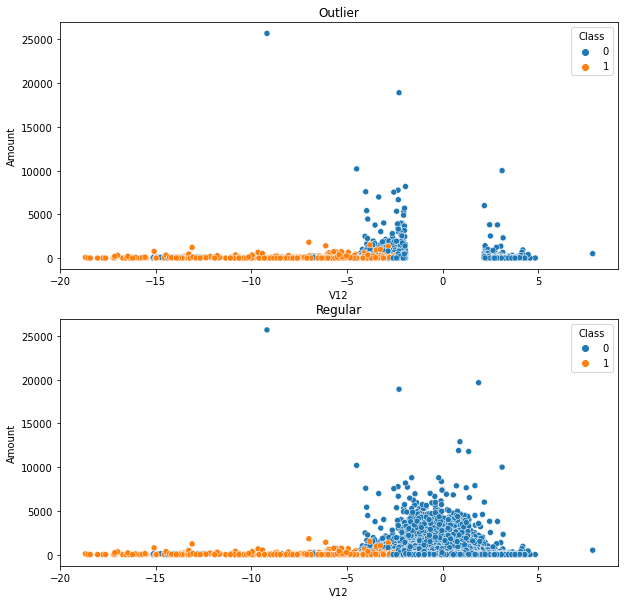

In [111]:
fig, axs = plt.subplots(nrows=2, figsize = (10,10))
g = sns.scatterplot(data = outlier['V12'], x = 'V12', y = 'Amount', hue = 'Class', ax = axs[0])
h = sns.scatterplot(data = regular['V12'], x = 'V12', y = 'Amount', hue = 'Class', ax = axs[1])
g.set_title("Outlier")
h.set_title('Regular')

# Class Imbalance 

From the countplot it is clear that there is a huge class imbalance within the dataset, some techniques to counteract this are: 

    - Oversampling 
    - Undersampling 

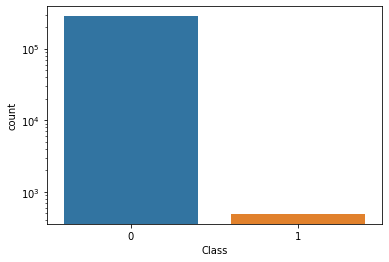

In [112]:
g = sns.countplot(data = df, x = 'Class')
g.set_yscale('log')

In [113]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Creating subsets of data 

    - Regular w/o ft 
    - Regular w/ ft
    - Undersampled w/o ft 
    - Undersampled w/ ft 
    - Oversampled w/o ft 
    - Oversampled w/ ft

In [7]:
def normalize(column_name, df): 
    normalized_column = (df[column_name]-df[column_name].mean())/df[column_name].std()
    
    return normalized_column

In [8]:
df.loc[:, 'Time'] = normalize('Time', df)
df.loc[:, 'Amount'] = normalize('Amount', df)

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-1.399629e-15,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,2.262601e-13,0.001727
std,1.000000e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000000e+00,0.041527
min,-1.996580e+00,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532288e-01,0.000000
25%,-8.552105e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308395e-01,0.000000
50%,-2.131450e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652710e-01,0.000000
75%,9.372158e-01,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471699e-02,0.000000
max,1.642055e+00,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023621e+02,1.000000


    - Time and Amount are now normalized

In [9]:
df_ft = df[useful_ft]
df_ft.head(10)

,Class,V17,V14,V12,V10,V16,V3,V7,V11,V4,Time,Amount
0,0,0.207971,-0.311169,-0.617801,0.090794,-0.470401,2.536347,0.239599,-0.551600,1.378155,-1.996580,0.244964
1,0,-0.114805,-0.143772,1.065235,-0.166974,0.463917,0.166480,-0.078803,1.612727,0.448154,-1.996580,-0.342474
2,0,1.109969,-0.165946,0.066084,0.207643,-2.890083,1.773209,0.791461,0.624501,0.379780,-1.996558,1.160684
3,0,-0.684093,-0.287924,0.178228,-0.054952,-1.059647,1.792993,0.237609,-0.226487,-0.863291,-1.996558,0.140534
4,0,-0.237033,-1.119670,0.538196,0.753074,-0.451449,1.548718,0.592941,-0.822843,0.403034,-1.996537,-0.073403
5,0,-0.058133,-0.137134,0.359894,-0.371407,0.401726,1.141109,0.476201,1.341262,-0.168252,-1.996537,-0.338556
6,0,0.002821,0.167372,-0.153826,-0.099254,-0.443587,0.045371,-0.005159,-1.416907,1.202613,-1.996495,-0.333278
7,0,-1.222127,-1.323865,0.291474,1.249376,-0.076127,1.074380,1.120631,-0.619468,-0.492199,-1.996432,-0.190107
8,0,-0.499768,0.074355,-0.110452,-0.410430,-0.210077,-0.113192,0.370145,-0.705117,-0.271526,-1.996432,0.019392
9,0,-0.540980,-0.443523,0.836390,-0.366846,0.739453,1.044367,0.651583,1.017614,-0.222187,-1.996390,-0.338516


In [10]:
count_0, count_1 = df.Class.value_counts()
count_0, count_1

(284315, 492)

<AxesSubplot:xlabel='Class', ylabel='count'>

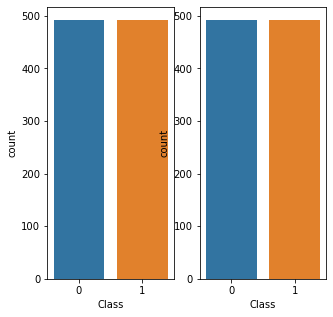

In [11]:
# Will be creating undersampled and oversampled data sets 

#Undersample: 

#w/o ft 
fraud_reg = df[df['Class']==1]
non_fraud_reg = df[df['Class']==0].sample(count_1, random_state = 123)
undersampled_df_reg = pd.concat([fraud_reg, non_fraud_reg], axis = 0)

#w/ft 
fraud_ft = df_ft[df_ft['Class']==1]
non_fraud_ft = df_ft[df_ft['Class']==0].sample(count_1, random_state = 123)
undersampled_df_ft = pd.concat([fraud_ft, non_fraud_ft], axis=0)

fig, axs = plt.subplots(ncols=2, figsize=(5,5))
sns.countplot(x = 'Class', data = undersampled_df_reg, ax = axs[0])
sns.countplot(x = 'Class', data = undersampled_df_ft, ax = axs[1])

<AxesSubplot:xlabel='Class', ylabel='count'>

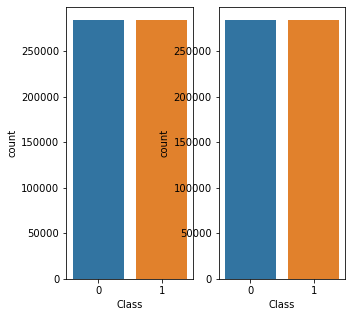

In [12]:
#Oversampled 

#w/o ft 
fraud_reg = df[df['Class']==1].sample(count_0, random_state = 123, replace = True)
non_fraud_reg = df[df['Class']==0]
oversampled_df_reg = pd.concat([fraud_reg, non_fraud_reg], axis = 0)

#w/ft 
fraud_ft = df_ft[df_ft['Class']==1].sample(count_0, random_state = 123, replace = True)
non_fraud_ft = df_ft[df_ft['Class']==0]

oversampled_df_ft = pd.concat([fraud_ft, non_fraud_ft], axis=0)

fig, axs = plt.subplots(ncols=2, figsize=(5,5))
sns.countplot(x = 'Class', data = oversampled_df_reg, ax = axs[0])
sns.countplot(x = 'Class', data = oversampled_df_ft, ax = axs[1])

In [16]:
#Each class should be appropriately balanced with their respective sets 

#Sanity check making sure each subset has the correct number of features 
print('Undersampled Regular')
print(undersampled_df_reg.columns.values)
print('Undersampled w/ft')
print(undersampled_df_ft.columns.values)
print('Oversampled Regular')
print(oversampled_df_reg.columns.values)
print('Oversampled w/ft')
print(oversampled_df_ft.columns.values)
print('Regular Data')
print(df.columns.values)
print('Regular w/ft')
print(df_ft.columns.values)

Undersampled Regular
['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']
Undersampled w/ft
['Class' 'V17' 'V14' 'V12' 'V10' 'V16' 'V3' 'V7' 'V11' 'V4' 'Time'
 'Amount']
Oversampled Regular
['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']
Oversampled w/ft
['Class' 'V17' 'V14' 'V12' 'V10' 'V16' 'V3' 'V7' 'V11' 'V4' 'Time'
 'Amount']
Regular Data
['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']
Regular w/ft
['Class' 'V17' 'V14' 'V12' 'V10' 'V16' 'V3' 'V7' 'V11' 'V4' 'Time'
 'Amount']


In [13]:
#Creating data and targets 

#Undersampled: 

#w/o ft
under_reg_data = undersampled_df_reg.drop(columns = 'Class')
under_reg_target = undersampled_df_reg['Class']

#w/ ft
under_ft_data = undersampled_df_ft.drop(columns = 'Class')
under_ft_target = undersampled_df_ft['Class']

#Oversampled: 

#w/o ft
over_reg_data = oversampled_df_reg.drop(columns = 'Class')
over_reg_target = oversampled_df_reg['Class']

#w/ ft
over_ft_data = oversampled_df_ft.drop(columns = 'Class')
over_ft_target = oversampled_df_ft['Class']

#Regular: 

#w/o ft 
reg_data = df.drop(columns=['Class'])
reg_targets = df['Class']

#w/ft
reg_ft_data = df_ft.drop(columns = ['Class'])
reg_ft_targets = df_ft['Class']

In [14]:
#Creating partitions 

#Undersampled:

#w/o ft 
under_reg_x_train, under_reg_x_test, under_reg_y_train, under_reg_y_test = train_test_split(under_reg_data, under_reg_target, test_size = 0.15, random_state = 123)
#w/ft 
under_ft_x_train, under_ft_x_test, under_ft_y_train, under_ft_y_test = train_test_split(under_ft_data, under_ft_target, test_size = 0.15, random_state = 123)

#Oversampled:

#w/o ft 
over_reg_x_train, over_reg_x_test, over_reg_y_train, over_reg_y_test = train_test_split(over_reg_data, over_reg_target, test_size = 0.3, random_state = 123)
#w/ft 
over_ft_x_train, over_ft_x_test, over_ft_y_train, over_ft_y_test = train_test_split(over_ft_data, over_ft_target, test_size = 0.3, random_state = 123)

#Regular 

#w/o ft 
reg_x_train, reg_x_test, reg_y_train, reg_y_test = train_test_split(reg_data, reg_targets, test_size = 0.3, random_state = 123)
#w/ft 
reg_ft_x_train, reg_ft_x_test, reg_ft_y_train, reg_ft_y_test = train_test_split(reg_ft_data, reg_ft_targets, test_size = 0.3, random_state = 123)

# Creating predictive models 

- I have created over/under and regular sampled data with and without the selected features, using these datasets I will be 
  be creating predictive models such as: 
        - Logistic Regression 
        - Decision Trees 
        - Random Tree Classifiers 
        - K Nearest Neighbours 
- Each model will be tested against a test set and evaluated based on performance, using a classification report  
- For cases dealing with fraud it is best to decrease the number of False Negatives: 
    - Predict non-fraud actually fraud 

In [19]:
reg_clf_lbfgs = logreg(solver = 'lbfgs', random_state = 123, max_iter = 100, C = 0.01)
reg_clf_lbfgs.fit(reg_x_train, reg_ft_y_train)
print(classification_report(reg_clf_lbfgs.predict(reg_x_test), reg_y_test))

tn, fp, fn, tp =  confusion_matrix(reg_y_test, reg_clf_lbfgs.predict(reg_x_test)).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85339
           1       0.57      0.88      0.69       104

    accuracy                           1.00     85443
   macro avg       0.78      0.94      0.84     85443
weighted avg       1.00      1.00      1.00     85443

True Negatives: 85270
True Positives: 91
False Positives: 13
False Negatives: 69


In [124]:
reg_clf_ft = logreg(solver = 'lbfgs', random_state = 123, max_iter = 100, C = 0.01)
reg_clf_ft.fit(reg_ft_x_train, reg_ft_y_train)
print(classification_report(reg_clf_ft.predict(reg_ft_x_test), reg_ft_y_test))

tn, fp, fn, tp =  confusion_matrix(reg_ft_y_test, reg_clf_ft.predict(reg_ft_x_test)).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85342
           1       0.56      0.88      0.68       101

    accuracy                           1.00     85443
   macro avg       0.78      0.94      0.84     85443
weighted avg       1.00      1.00      1.00     85443

True Negatives: 85271
True Positives: 89
False Positives: 12
False Negatives: 71


In [125]:
under_reg_clf = logreg(solver = 'lbfgs', random_state = 123, max_iter = 100, C = 0.01)
under_reg_clf.fit(under_reg_x_train, under_reg_y_train)
print(classification_report(under_reg_clf.predict(reg_x_test), reg_y_test))

tn, fp, fn, tp =  confusion_matrix(reg_y_test, under_reg_clf.predict(reg_x_test)).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     84360
           1       0.89      0.13      0.23      1083

    accuracy                           0.99     85443
   macro avg       0.94      0.57      0.61     85443
weighted avg       0.99      0.99      0.98     85443

True Negatives: 84343
True Positives: 143
False Positives: 940
False Negatives: 17


In [126]:
under_ft_clf = logreg(solver = 'lbfgs', random_state = 123, max_iter = 100, C = 0.01)
under_ft_clf.fit(under_ft_x_train, under_ft_y_train)
print(classification_report(under_ft_clf.predict(reg_ft_x_test), reg_ft_y_test))

tn, fp, fn, tp =  confusion_matrix(reg_ft_y_test, under_ft_clf.predict(reg_ft_x_test)).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     84441
           1       0.89      0.14      0.24      1002

    accuracy                           0.99     85443
   macro avg       0.94      0.57      0.62     85443
weighted avg       0.99      0.99      0.99     85443

True Negatives: 84423
True Positives: 142
False Positives: 860
False Negatives: 18


In [127]:
over_reg_clf = logreg(solver = 'lbfgs', random_state = 123, max_iter = 100, C = 0.1)
over_reg_clf.fit(over_reg_x_train, over_reg_y_train)
print(classification_report(over_reg_clf.predict(reg_x_test), reg_y_test))

tn, fp, fn, tp =  confusion_matrix(reg_y_test, over_reg_clf.predict(reg_x_test)).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     83421
           1       0.92      0.07      0.13      2022

    accuracy                           0.98     85443
   macro avg       0.95      0.54      0.56     85443
weighted avg       0.98      0.98      0.97     85443

True Negatives: 83408
True Positives: 147
False Positives: 1875
False Negatives: 13


In [128]:
over_ft_clf = logreg(solver = 'lbfgs', random_state = 123, max_iter = 100, C = 0.1)
over_ft_clf.fit(over_ft_x_train, over_ft_y_train)
print(classification_report(over_ft_clf.predict(reg_ft_x_test), reg_ft_y_test))

tn, fp, fn, tp =  confusion_matrix(reg_ft_y_test, over_ft_clf.predict(reg_ft_x_test)).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     83399
           1       0.91      0.07      0.13      2044

    accuracy                           0.98     85443
   macro avg       0.94      0.54      0.56     85443
weighted avg       0.98      0.98      0.97     85443

True Negatives: 83384
True Positives: 145
False Positives: 1899
False Negatives: 15


# Comparison between regular and selected features: 

    - The models built on the regular data with selected features and all the features raise a lot of false negatives, in this situation it best to disregard these models as it will hurt a bank even though recall is better than most of the other models
    
    - Logistic Regression model trained on oversampled data with all the features performs the best because it has the least amount of false negative predictions
    
    - The other models produce more false negatives meaning they classify a transaction as non-fraudulent when it really is, hence they are a bad model because this effectively will cost banks lots of customers

# Decision Tree 

    - Sklearn's Decision Tree class has these hyperparameters that can be tuned: 
    - Using cost complexity pruning I will find the optimal alpha for each Decision Tree then use other metrics to determine the best tree 

In [50]:
tree_reg = DecisionTreeClassifier()
tree_reg.fit(reg_x_train, reg_y_train)

DecisionTreeClassifier()

In [51]:
dot_data = export_graphviz(tree_reg, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree1.png')

True

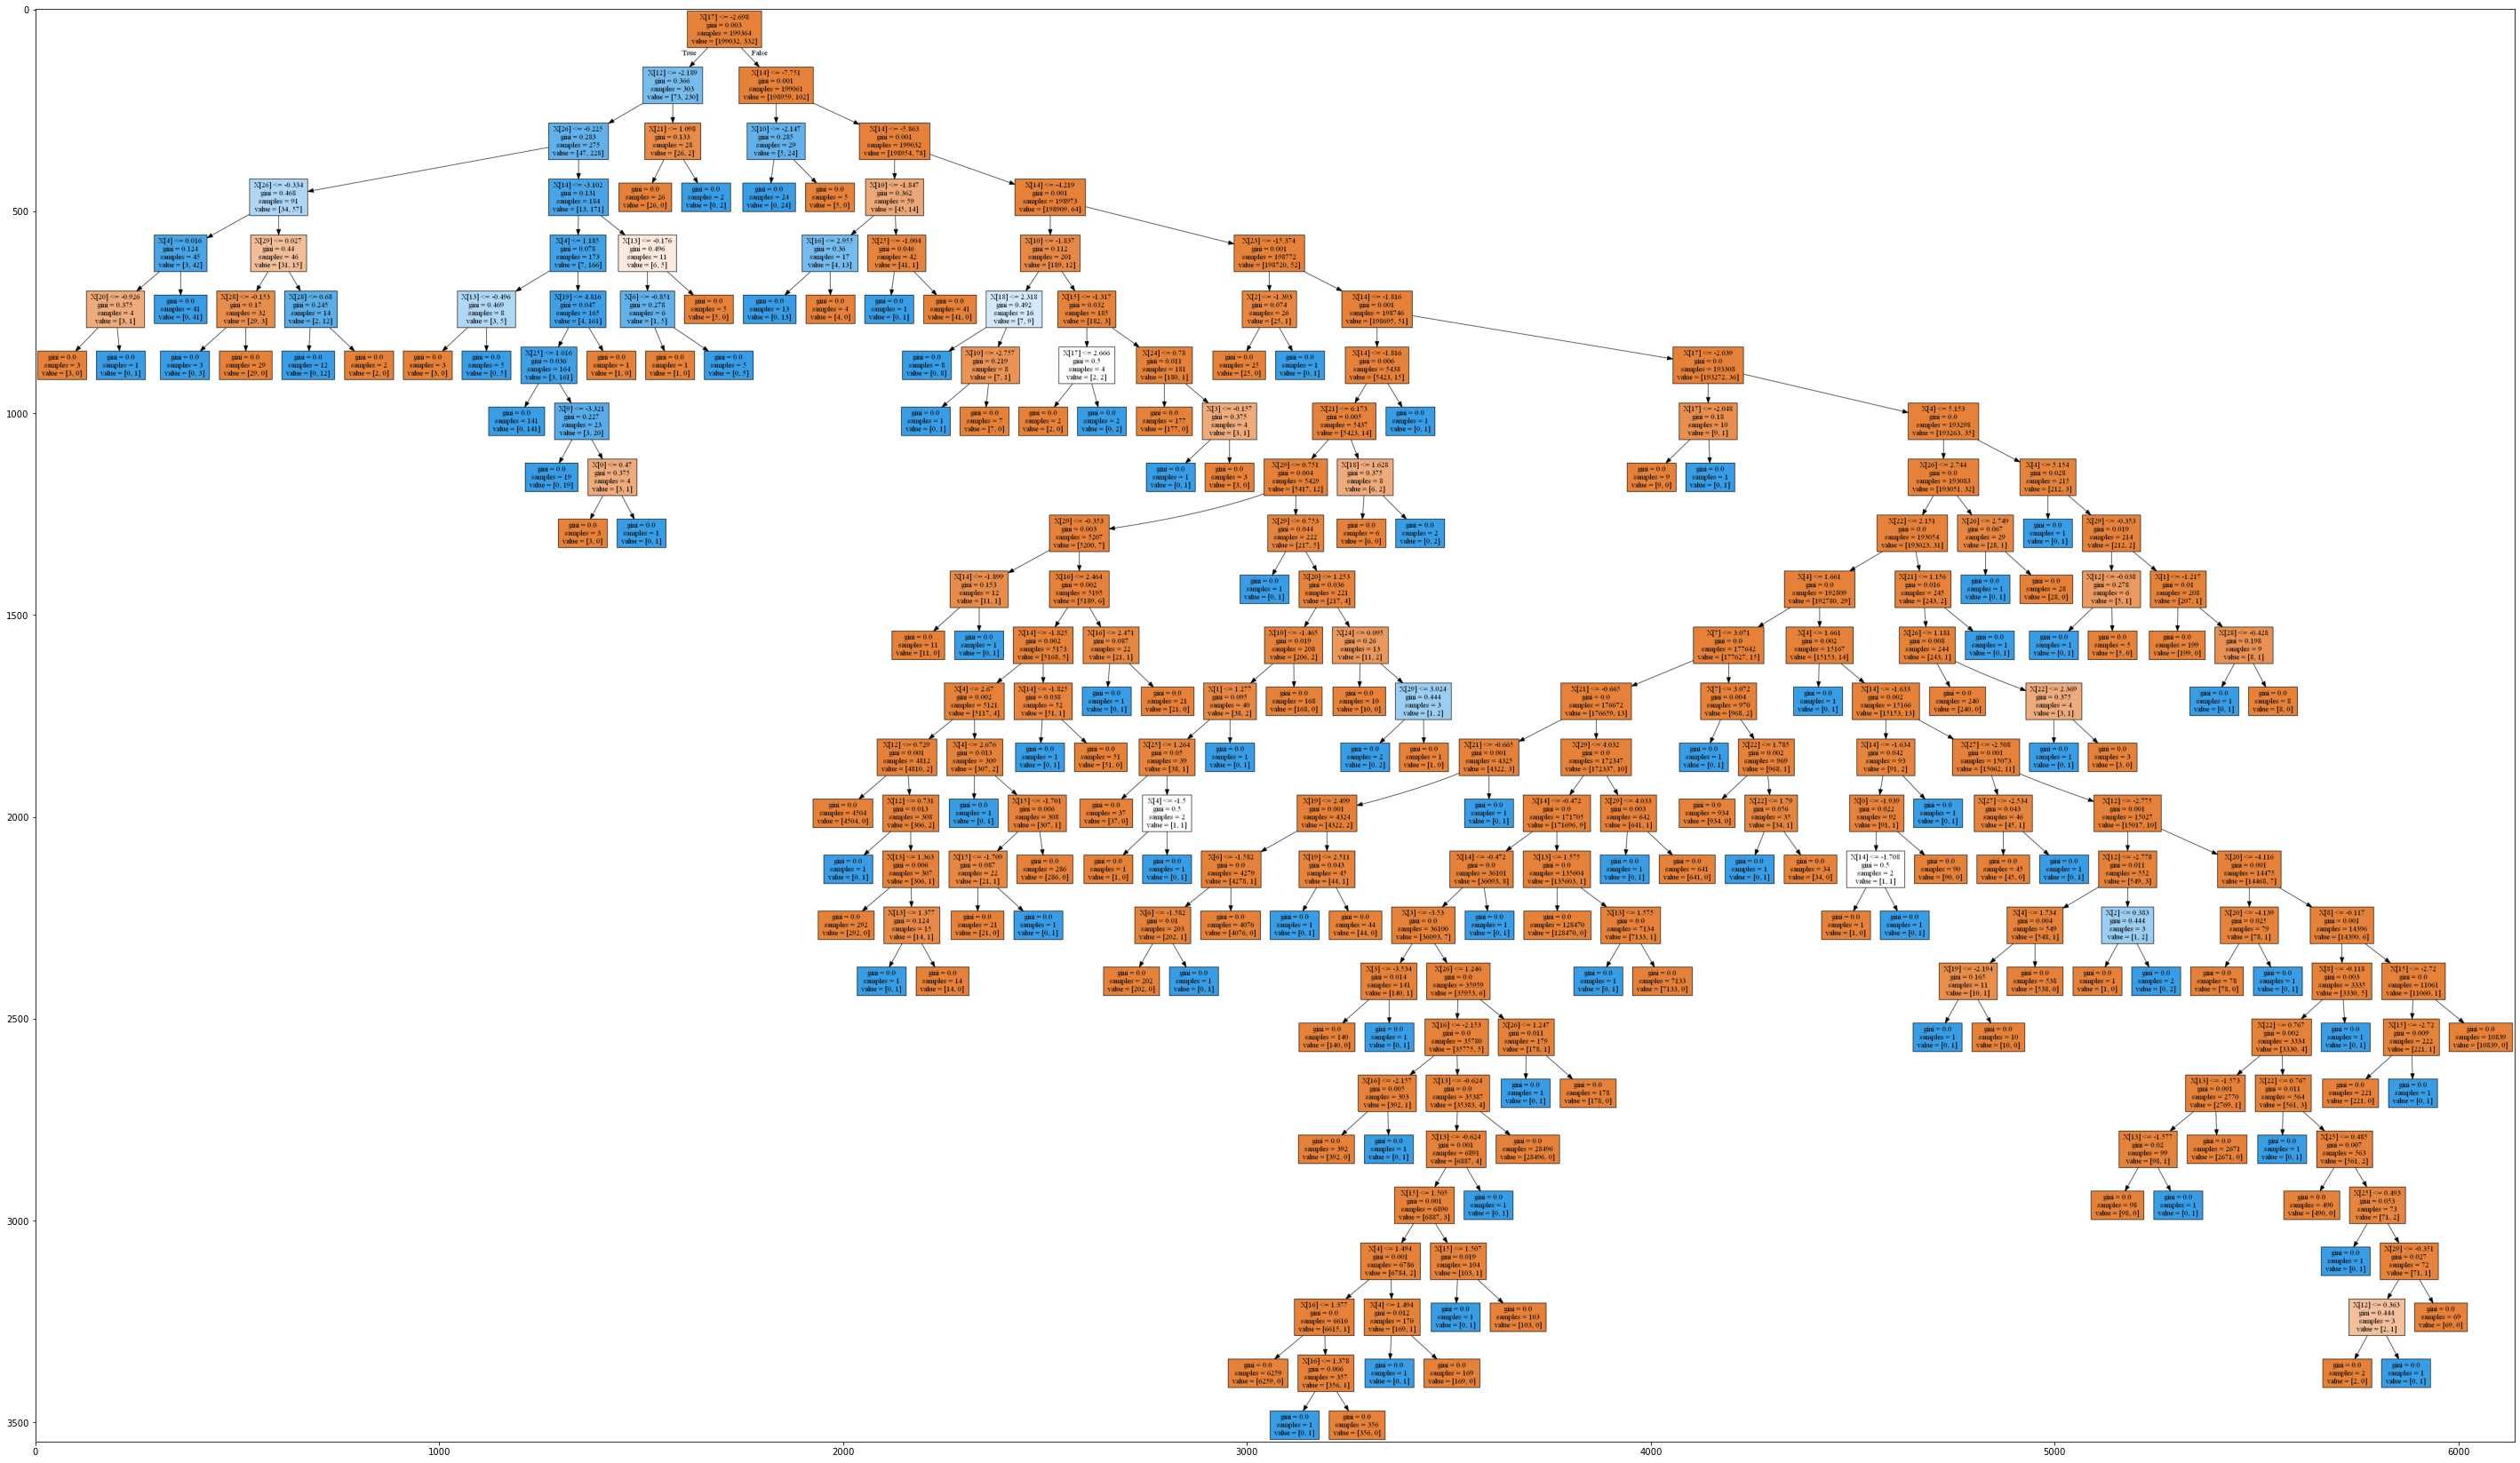

In [52]:
plt.figure(figsize = (50,50))
plt.imshow(plt.imread('tree1.png'))

In [53]:
print(classification_report(tree_reg.predict(reg_x_test), reg_y_test))

tn, fp, fn, tp =  confusion_matrix(reg_y_test, tree_reg.predict(reg_x_test)).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

#Clearly overfit to the training data, pruning must be done to reduce this 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85284
           1       0.77      0.77      0.77       159

    accuracy                           1.00     85443
   macro avg       0.88      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443

True Negatives: 85247
True Positives: 123
False Positives: 36
False Negatives: 37


In [54]:
ccp = tree_reg.cost_complexity_pruning_path(reg_x_train, reg_y_train)
alphas, impurities = ccp.ccp_alphas, ccp.impurities

In [55]:
false_negatives_test = []
for alpha in alphas: 
    clf = DecisionTreeClassifier(random_state = 123, ccp_alpha=alpha)
    clf.fit(reg_x_train, reg_y_train)
    tn, fp, fn, tp =  confusion_matrix(reg_y_test, clf.predict(reg_x_test)).ravel().astype('int')
    false_negatives_test.append(fn)

Text(0, 0.5, 'No of False Negatives')

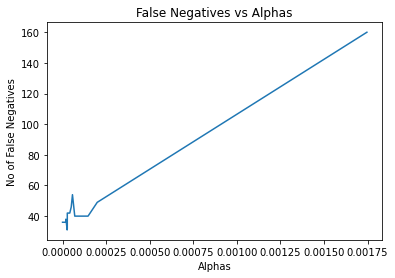

In [56]:
plt.plot(alphas, false_negatives_test)
plt.title('False Negatives vs Alphas')
plt.xlabel('Alphas')
plt.ylabel('No of False Negatives')
# Lower alpha means lower false negatives 

In [59]:
#Finding optimal value for lowest amount of false negatives
alpha = alphas[false_negatives_test.index(min(false_negatives_test))]
clf_reg = DecisionTreeClassifier(random_state = 123, ccp_alpha = alpha)
clf_reg.fit(reg_x_train, reg_y_train)
print(classification_report(reg_y_test, clf.predict(reg_x_test)))
tn, fp, fn, tp =  confusion_matrix(reg_y_test, clf.predict(reg_x_test)).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.00      0.00      0.00       160

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

True Negatives: 85283
True Positives: 0
False Positives: 0
False Negatives: 160


C:\Users\saiko\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#Repeat same process with different sets of data 
clf_reg_ft = DecisionTreeClassifier(random_state = 123)

In [61]:
ccp = clf_reg_ft.cost_complexity_pruning_path(reg_ft_x_train, reg_ft_y_train)
alphas_reg_ft = ccp.ccp_alphas

In [62]:
false_negatives_test = []
for alpha in alphas_reg_ft: 
    clf = DecisionTreeClassifier(random_state = 123, ccp_alpha=alpha)
    clf.fit(reg_ft_x_train, reg_ft_y_train)
    tn, fp, fn, tp =  confusion_matrix(reg_ft_y_test, clf.predict(reg_ft_x_test)).ravel().astype('str')
    false_negatives_test.append(fn)

Text(0, 0.5, 'No of False Negatives')

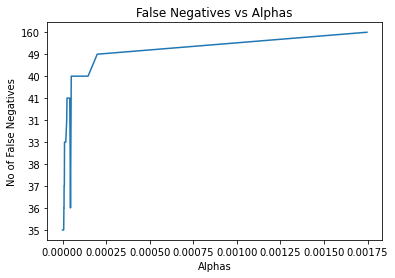

In [63]:
plt.plot(alphas_reg_ft, false_negatives_test)
plt.title('False Negatives vs Alphas')
plt.xlabel('Alphas')
plt.ylabel('No of False Negatives')
# Lower alpha means lower false negatives 

In [66]:
alpha = alphas_reg_ft[false_negatives_test.index(min(false_negatives_test))]
clf_reg_ft = DecisionTreeClassifier(random_state = 123, ccp_alpha = alpha)
clf_reg_ft.fit(reg_ft_x_train, reg_ft_y_train)
print(classification_report(reg_ft_y_test, clf_reg_ft.predict(reg_ft_x_test)))
tn, fp, fn, tp =  confusion_matrix(reg_ft_y_test, clf_reg_ft.predict(reg_ft_x_test)).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.00      0.00      0.00       160

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

True Negatives: 85283
True Positives: 0
False Positives: 0
False Negatives: 160


C:\Users\saiko\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
clf_under_reg = DecisionTreeClassifier(random_state = 123)
ccp = clf_under_reg.cost_complexity_pruning_path(under_reg_x_train, under_reg_y_train)
alphas_under_reg = ccp.ccp_alphas

In [68]:
false_negatives_test = []
for alpha in alphas_under_reg: 
    clf = DecisionTreeClassifier(random_state = 123, ccp_alpha=alpha)
    clf.fit(reg_ft_x_train, reg_ft_y_train)
    tn, fp, fn, tp =  confusion_matrix(reg_ft_y_test, clf.predict(reg_ft_x_test)).ravel().astype('int')
    false_negatives_test.append(fn)

In [71]:
alpha = alphas_reg_ft[false_negatives_test.index(min(false_negatives_test))]
clf_under_reg = DecisionTreeClassifier(random_state = 123, ccp_alpha = alpha)
clf_under_reg.fit(under_reg_x_train, under_reg_y_train)
print(classification_report(reg_ft_y_test, clf_under_reg.predict(reg_x_test)))
tn, fp, fn, tp =  confusion_matrix(reg_ft_y_test, clf_under_reg.predict(reg_x_test)).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85283
           1       0.02      0.99      0.04       160

    accuracy                           0.90     85443
   macro avg       0.51      0.95      0.49     85443
weighted avg       1.00      0.90      0.95     85443

True Negatives: 77077
True Positives: 159
False Positives: 8206
False Negatives: 1


In [73]:
clf_under_ft = DecisionTreeClassifier(random_state = 123)
ccp = clf_under_ft.cost_complexity_pruning_path(under_ft_x_train, under_ft_y_train)
alphas_under_ft = ccp.ccp_alphas

In [68]:
false_negatives_test = []
for alpha in alphas_under_ft: 
    clf = DecisionTreeClassifier(random_state = 123, ccp_alpha=alpha)
    clf.fit(reg_ft_x_train, reg_ft_y_train)
    tn, fp, fn, tp =  confusion_matrix(reg_ft_y_test, clf.predict(reg_ft_x_test)).ravel().astype('int')
    false_negatives_test.append(fn)

In [75]:
alpha = alphas_under_ft[false_negatives_test.index(min(false_negatives_test))]
clf_under_ft = DecisionTreeClassifier(random_state = 123, ccp_alpha = alpha)
clf_under_ft.fit(under_ft_x_train, under_ft_y_train)
print(classification_report(reg_ft_y_test, clf_under_ft.predict(reg_ft_x_test)))
tn, fp, fn, tp =  confusion_matrix(reg_ft_y_test, clf_under_ft.predict(reg_ft_x_test)).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85283
           1       0.02      0.99      0.04       160

    accuracy                           0.91     85443
   macro avg       0.51      0.95      0.50     85443
weighted avg       1.00      0.91      0.95     85443

True Negatives: 77590
True Positives: 158
False Positives: 7693
False Negatives: 2


In [15]:
clf_over_reg = DecisionTreeClassifier(random_state = 123)
ccp = clf_over_reg.cost_complexity_pruning_path(over_reg_x_train, over_reg_y_train)
alphas_over_reg = ccp.ccp_alphas

In [16]:
false_negatives_test = []
for alpha in alphas_over_reg: 
    clf = DecisionTreeClassifier(random_state = 123, ccp_alpha=alpha)
    clf.fit(over_reg_x_train, over_reg_y_train)
    tn, fp, fn, tp =  confusion_matrix(over_reg_y_test, clf.predict(over_reg_x_test)).ravel().astype('int')
    false_negatives_test.append(fn)

In [19]:
alpha = alphas_over_reg[false_negatives_test.index(min(false_negatives_test))]
clf_over_reg = DecisionTreeClassifier(random_state = 123, ccp_alpha = alpha)
clf_over_reg.fit(over_reg_x_train, over_reg_y_train)
print(classification_report(reg_y_test, clf_over_reg.predict(reg_x_test)))
tn, fp, fn, tp =  confusion_matrix(reg_y_test, clf_over_reg.predict(reg_x_test)).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.94      1.00      0.97       160

    accuracy                           1.00     85443
   macro avg       0.97      1.00      0.98     85443
weighted avg       1.00      1.00      1.00     85443

True Negatives: 85273
True Positives: 160
False Positives: 10
False Negatives: 0


In [20]:
clf_over_ft = DecisionTreeClassifier(random_state = 123)
ccp = clf_over_ft.cost_complexity_pruning_path(over_ft_x_train, over_ft_y_train)
alphas_over_ft = ccp.ccp_alphas

In [21]:
false_negatives_test = []
for alpha in alphas_over_ft: 
    clf = DecisionTreeClassifier(random_state = 123, ccp_alpha=alpha)
    clf.fit(over_ft_x_train, over_ft_y_train)
    tn, fp, fn, tp =  confusion_matrix(over_ft_y_test, clf.predict(over_ft_x_test)).ravel().astype('int')
    false_negatives_test.append(fn)

In [22]:
alpha = alphas_over_ft[false_negatives_test.index(min(false_negatives_test))]
clf_over_reg = DecisionTreeClassifier(random_state = 123, ccp_alpha = alpha)
clf_over_reg.fit(over_ft_x_train, over_ft_y_train)
print(classification_report(reg_ft_y_test, clf_over_reg.predict(reg_ft_x_test)))
tn, fp, fn, tp =  confusion_matrix(reg_ft_y_test, clf_over_reg.predict(reg_ft_x_test)).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.88      1.00      0.94       160

    accuracy                           1.00     85443
   macro avg       0.94      1.00      0.97     85443
weighted avg       1.00      1.00      1.00     85443

True Negatives: 85262
True Positives: 160
False Positives: 21
False Negatives: 0


# Evaluation of Decision Trees 

    - The Decision tree fit to the regular data with no pruning or feature selection provides a baseline model 
    - What I am looking for is a model that has the least amount of false negative predictions 
    - When looking at the models the regular data and regular data with selected features do not provide many true positive scores and they also have a high number of false negatives 
    - The undersampled data has a high number of false positives and negatives, therefore disqualifying it as a predictive model because in practice this can cause lots of harm 
    - The best Decision Tree Classifier is the model that has been fit to oversampled with all the features 
        - Compared to the rest of the models the precision and accuracy is better 
        - The number of false positives is drastically lower compared to the others 
        - The number of false negatives is 0 
        - Therefore this model performs much better than the others 
        
    - From the results here and the logistic regression results it is safe to assume the undersampled data is not appropriate data as with both models, the underperform
        - When testing models I will be now testing models using the oversampled data with all and selected features 

In [30]:
reg_ft_x_train.shape

(199364, 11)

In [35]:
def get_model_reg(num_nodes): 
    
    model = models.Sequential()
    model.add(layers.Dense(num_nodes, activation = 'relu', input_shape = (30,)))
    model.add(layers.Dense(num_nodes, activation = 'relu')),
    model.add(layers.Dense(num_nodes, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
    
    return model 

def get_model_ft(num_nodes): 
    
    model = models.Sequential()
    model.add(layers.Dense(num_nodes, activation = 'relu', input_shape = (11,)))
    model.add(layers.Dense(num_nodes, activation = 'relu')),
    model.add(layers.Dense(num_nodes, activation = 'relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
    
    return model

In [37]:
model_reg = get_model_reg(16)
model_reg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_reg.fit(
    reg_x_train, 
    reg_ft_y_train, 
    epochs = 10, 
    batch_size = 10,
    validation_data = (reg_x_test, reg_y_test)
)

Epoch 1/10
19937/19937 [==============================] - 65s 3ms/step - loss: 0.0209 - acc: 0.9987 - val_loss: 0.0118 - val_acc: 0.9993
Epoch 2/10
19937/19937 [==============================] - 58s 3ms/step - loss: 0.0108 - acc: 0.9994 - val_loss: 0.0114 - val_acc: 0.9993
Epoch 3/10
19937/19937 [==============================] - 59s 3ms/step - loss: 0.0095 - acc: 0.9995 - val_loss: 0.0122 - val_acc: 0.9993
Epoch 4/10
19937/19937 [==============================] - 79s 4ms/step - loss: 0.0110 - acc: 0.9994 - val_loss: 0.0099 - val_acc: 0.9993
Epoch 5/10
19937/19937 [==============================] - 79s 4ms/step - loss: 0.0096 - acc: 0.9995 - val_loss: 0.0092 - val_acc: 0.9993
Epoch 6/10
19937/19937 [==============================] - 84s 4ms/step - loss: 0.0099 - acc: 0.9993 - val_loss: 0.0101 - val_acc: 0.9993
Epoch 7/10
19937/19937 [==============================] - 87s 4ms/step - loss: 0.0096 - acc: 0.9994 - val_loss: 0.0117 - val_acc: 0.9993
Epoch 8/10
19937/19937 [=================

In [53]:
#After 8 epochs the the loss increases, therefore 8 epochs should be the training time 

In [54]:
print(classification_report(reg_y_test, np.round(model_reg.predict(reg_x_test))))
tn, fp, fn, tp =  confusion_matrix(reg_y_test, np.round(model_reg.predict(reg_x_test))).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.81      0.81      0.81       160

    accuracy                           1.00     85443
   macro avg       0.91      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443

True Negatives: 85253
True Positives: 129
False Positives: 30
False Negatives: 31


In [56]:
model_over_reg = get_model_reg(16)
model_over_ft = get_model_ft(16)

In [57]:
model_over_reg.fit( 
    over_reg_x_train, 
    over_reg_y_train, 
    epochs = 10, 
    validation_data = (over_reg_x_test, over_reg_y_test)
)

Epoch 1/10
12439/12439 [==============================] - 11s 814us/step - loss: 0.0779 - acc: 0.9719 - val_loss: 0.0152 - val_acc: 0.9967
Epoch 2/10
12439/12439 [==============================] - 10s 801us/step - loss: 0.0167 - acc: 0.9965 - val_loss: 0.0174 - val_acc: 0.9966
Epoch 3/10
12439/12439 [==============================] - 10s 800us/step - loss: 0.0158 - acc: 0.9971 - val_loss: 0.0144 - val_acc: 0.9970
Epoch 4/10
12439/12439 [==============================] - 10s 822us/step - loss: 0.0152 - acc: 0.9970 - val_loss: 0.0197 - val_acc: 0.9963
Epoch 5/10
12439/12439 [==============================] - 10s 812us/step - loss: 0.0152 - acc: 0.9972 - val_loss: 0.0132 - val_acc: 0.9972
Epoch 6/10
12439/12439 [==============================] - 11s 847us/step - loss: 0.0136 - acc: 0.9975 - val_loss: 0.0149 - val_acc: 0.9964
Epoch 7/10
12439/12439 [==============================] - 10s 811us/step - loss: 0.0115 - acc: 0.9979 - val_loss: 0.0138 - val_acc: 0.9977
Epoch 8/10
12439/12439 [===

In [59]:
print(classification_report(reg_y_test, np.round(model_over_reg.predict(reg_x_test))))
tn, fp, fn, tp =  confusion_matrix(reg_y_test, np.round(model_over_reg.predict(reg_x_test))).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.30      1.00      0.46       160

    accuracy                           1.00     85443
   macro avg       0.65      1.00      0.73     85443
weighted avg       1.00      1.00      1.00     85443

True Negatives: 84912
True Positives: 160
False Positives: 371
False Negatives: 0


In [58]:
model_over_ft.fit(
    over_ft_x_train, 
    over_ft_y_train, 
    epochs = 10, 
    validation_data = (over_ft_x_test, over_ft_y_test)
)

Epoch 1/10
12439/12439 [==============================] - 12s 899us/step - loss: 0.1186 - acc: 0.9522 - val_loss: 0.0343 - val_acc: 0.9904
Epoch 2/10
12439/12439 [==============================] - 10s 791us/step - loss: 0.0317 - acc: 0.9919 - val_loss: 0.0236 - val_acc: 0.9949
Epoch 3/10
12439/12439 [==============================] - 11s 887us/step - loss: 0.0269 - acc: 0.9943 - val_loss: 0.0252 - val_acc: 0.9948
Epoch 4/10
12439/12439 [==============================] - 12s 948us/step - loss: 0.0280 - acc: 0.9947 - val_loss: 0.0282 - val_acc: 0.9956
Epoch 5/10
12439/12439 [==============================] - 14s 1ms/step - loss: 0.0327 - acc: 0.9945 - val_loss: 0.0290 - val_acc: 0.9949
Epoch 6/10
12439/12439 [==============================] - 13s 1ms/step - loss: 0.0331 - acc: 0.9942 - val_loss: 0.0283 - val_acc: 0.9951
Epoch 7/10
12439/12439 [==============================] - 14s 1ms/step - loss: 0.0292 - acc: 0.9945 - val_loss: 0.0247 - val_acc: 0.9954
Epoch 8/10
12439/12439 [=========

In [60]:
print(classification_report(reg_ft_y_test, np.round(model_over_ft.predict(reg_ft_x_test))))
tn, fp, fn, tp =  confusion_matrix(reg_ft_y_test, np.round(model_over_ft.predict(reg_ft_x_test))).ravel().astype('str')
print('True Negatives: ' + tn)
print('True Positives: ' + tp)
print('False Positives: ' + fp)
print('False Negatives: ' + fn)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85283
           1       0.15      1.00      0.27       160

    accuracy                           0.99     85443
   macro avg       0.58      0.99      0.63     85443
weighted avg       1.00      0.99      0.99     85443

True Negatives: 84400
True Positives: 160
False Positives: 883
False Negatives: 0


# Evaluating Models 

    - The baseline model is a model trained with the regular data including all the features 
    - Comparing the two models trained with oversampled data with selected and all the features to the baseline model               - It is clear that once again the model trained with oversampled data with all the features outperforms the other model 
        - The number of false positives predicted for the model with selected features is much higher than the model trained with all the features 
   

# Model Selection 

    - The best model is the Decision Tree Classifier trained on oversampled data with all the features 
        - Compared to the Logistic Regression Model and Neural Network 
            - Logistic Regression: 
                - False Positives: 1875 
                - False Negatives: 13 
            - Neural Network: 
                - False Positives: 371 
                - False Negatives: 0 
            - Decision Tree: 
                - False Positives: 10 
                - False Negatives: 0 
                
    - From this comparison it is obvious that the Decision Tree Classifier will cause the least amount of harm to a bank because the number of false positives and negatives are much lower than the rest of the classifiers 

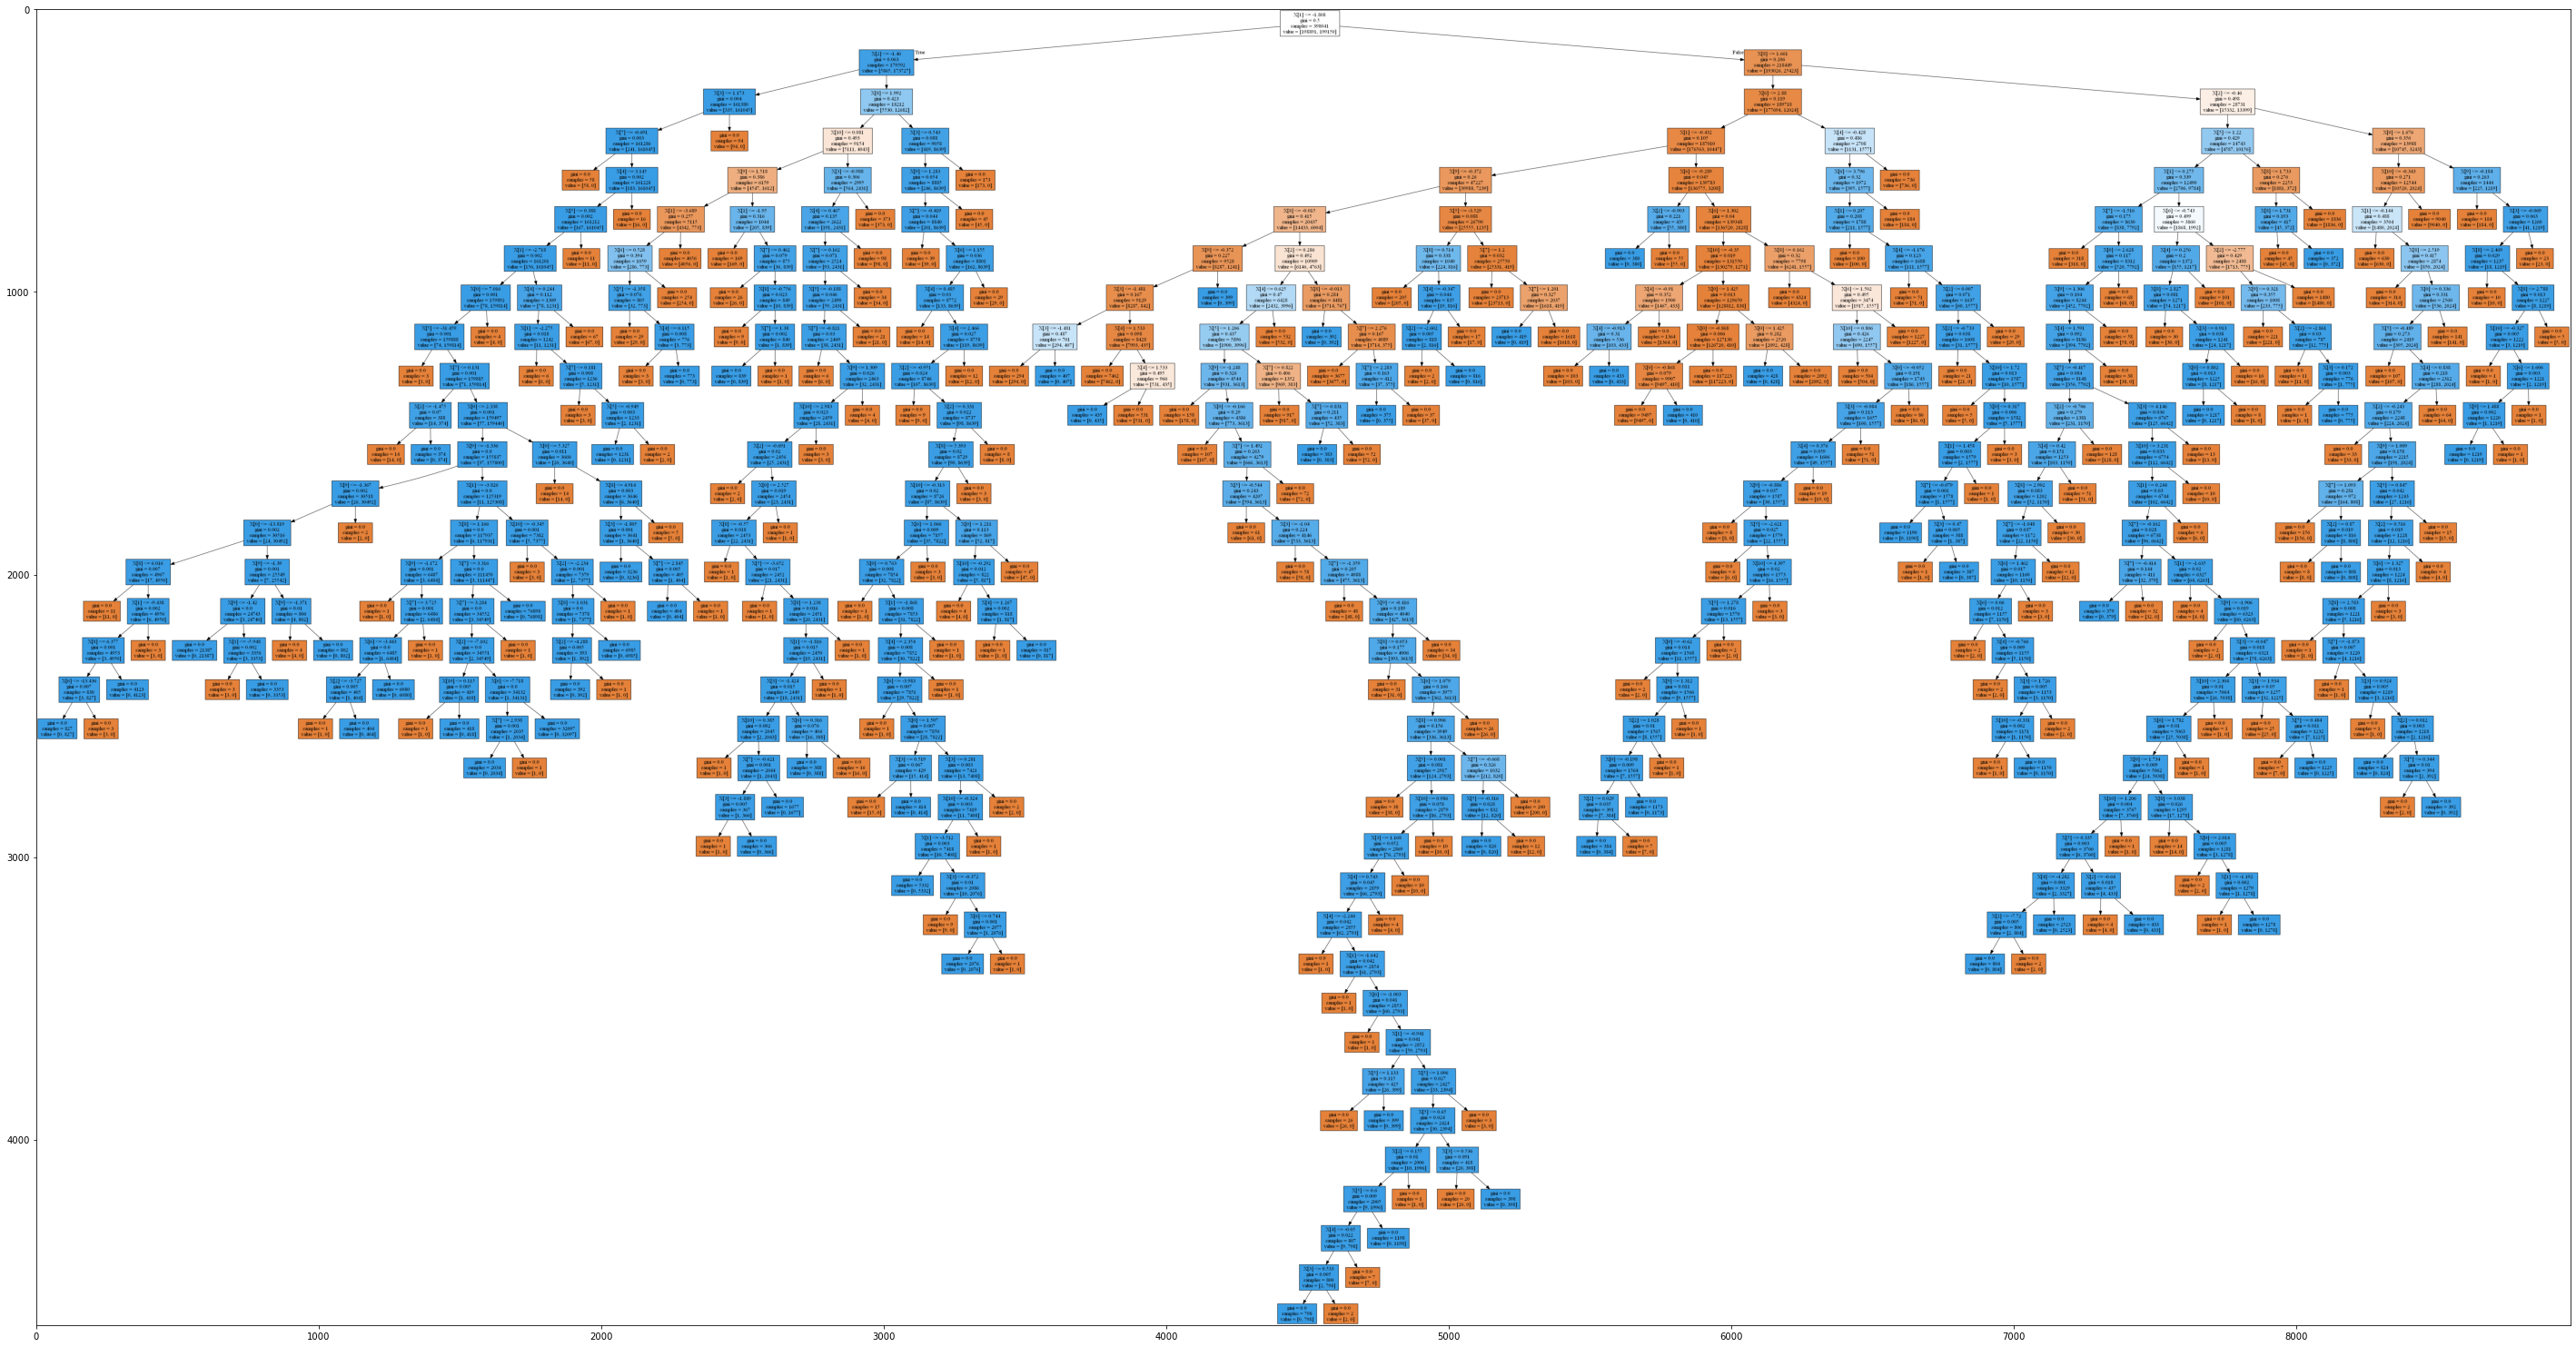

In [62]:
dot_data = export_graphviz(clf_over_reg, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree_over_reg.png')
plt.figure(figsize = (50,50))
plt.imshow(plt.imread('tree_over_reg.png'))